В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:

medical_df = pd.read_csv('C:/Users/dcmaterik_1/Documents/ML_for_people/Data/Lesson3_Linear_regresion/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [5]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [6]:
X = non_smoker_df['age']

In [7]:
X

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [8]:
y = non_smoker_df['charges']

In [9]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [10]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    matrix = X.T.dot(X)
    if np.linalg.det(matrix) != 0:
        theta = np.linalg.inv(matrix).dot(X.T).dot(y)
        return theta

In [11]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [12]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [13]:
MNK_coefs

array([-2091.42055657,   267.24891283])

**Спостереження**
Коефіцієнти моделі МНК -2091.42055657,   267.24891283

In [14]:
np.dot(X_with_intercept[0], MNK_coefs)

2719.059874396516

**Спостежерення**
реальне значення y для першого значення х - 1725. Наш предикшин - 2719. Помилка біль ніж на 1000 одиниць

In [15]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [16]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

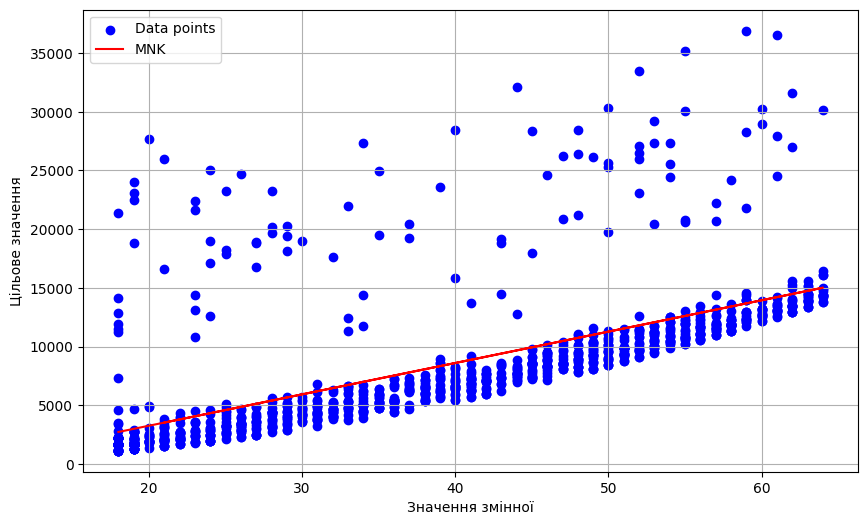

In [17]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_MNK = mean_squared_error(y, predictions_MNK, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
X

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [21]:
X_transform = X_n.reshape(X.shape[0], 1)

In [26]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [27]:
m, b, errors = full_batch_gradient_descent(X_transform, y, lr=0.0001, epochs=1000)
predictions_fbgd1 = m * X_transform + b

m, b

(221.1045843794301, -41.98126853149978)

In [28]:
predictions_fbgd1[:3], y[:3]

(array([[3937.9012503 ],
        [6148.94709409],
        [7254.47001599]]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [29]:
rmse = mean_squared_error(y, predictions_fbgd1, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4713.25


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Error')

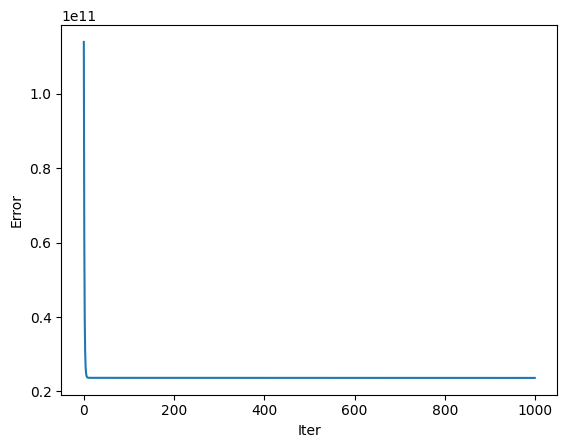

In [31]:
plt.plot(errors);
plt.xlabel('Iter')
plt.ylabel('Error')

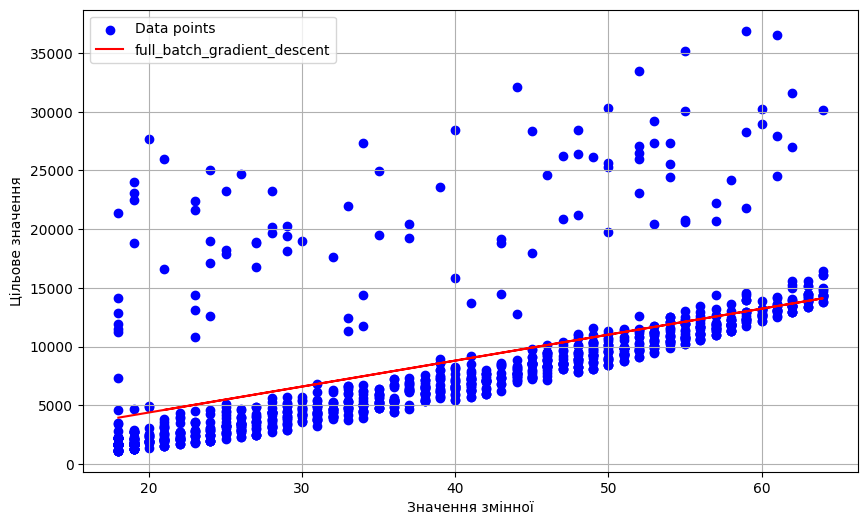

In [45]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd1, color='red', label='full_batch_gradient_descent')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
m, b, errors = full_batch_gradient_descent(X_transform, y, lr=0.00001, epochs=1000)
predictions_fbgd2 = m * X_transform + b

m, b

(220.15455551129122, 0.21300652799863293)

In [36]:
predictions_fbgd2[:3], y[:3]

(array([[3962.99500573],
        [6164.54056084],
        [7265.3133384 ]]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [37]:
rmse = mean_squared_error(y, predictions_fbgd2, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4715.35


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Error')

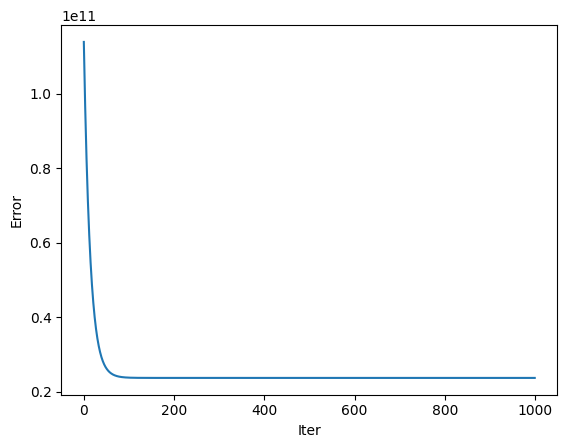

In [38]:
plt.plot(errors);
plt.xlabel('Iter')
plt.ylabel('Error')

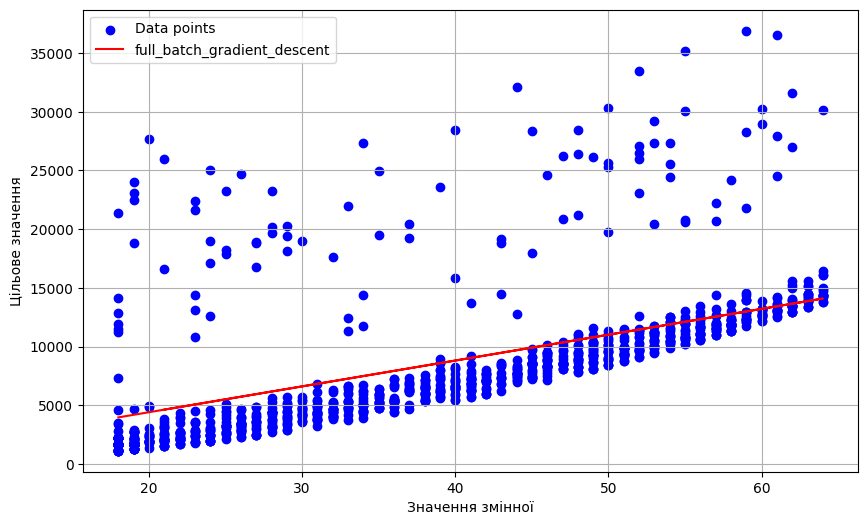

In [46]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd2, color='red', label='full_batch_gradient_descent')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
m, b, errors = full_batch_gradient_descent(X_transform, y, lr=0.00009, epochs=10000)
predictions_fbgd = m * X_transform + b

m, b

(228.75012890539517, -381.5480117402656)

In [41]:
predictions_fbgd[:3], y[:3]

(array([[3735.95430856],
        [6023.45559761],
        [7167.20624214]]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [60]:
rmse_fbgd = mean_squared_error(y, predictions_fbgd, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Спостереження** 
Root Mean Squared Error: 4697.89 найменша при параметрах lr=0.00009, epochs=10000

Text(0, 0.5, 'Error')

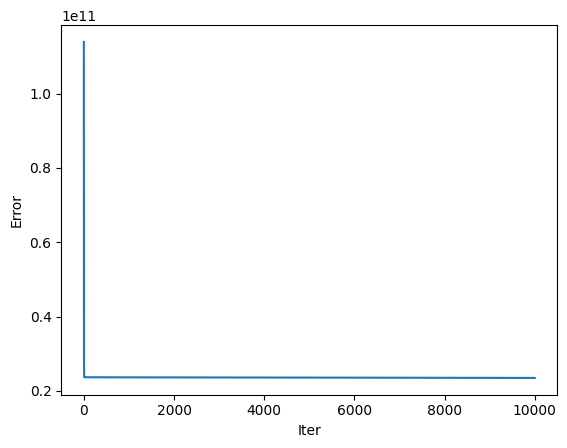

In [43]:
plt.plot(errors);
plt.xlabel('Iter')
plt.ylabel('Error')

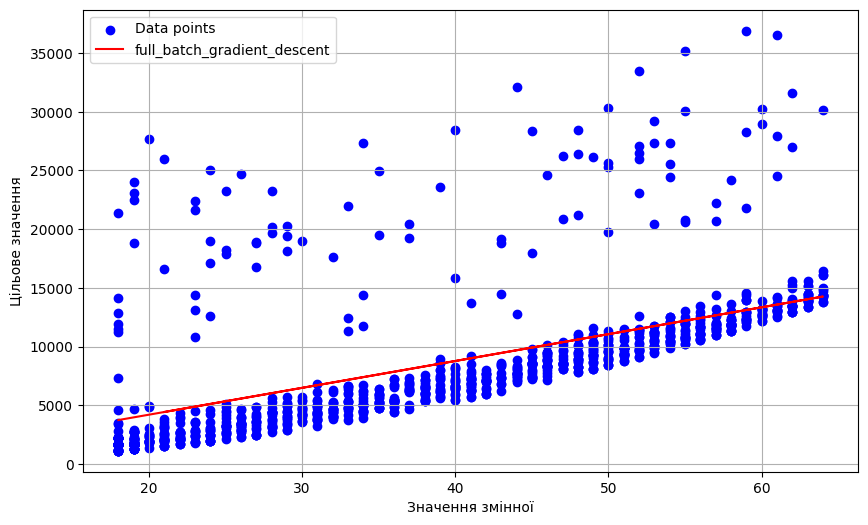

In [49]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd, color='red', label='full_batch_gradient_descent')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X.to_frame(), y)

LinearRegression()

In [52]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [53]:
predictions_sklearn = lin_reg.predict(X.to_frame())

In [54]:
predictions_sklearn[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [61]:
rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


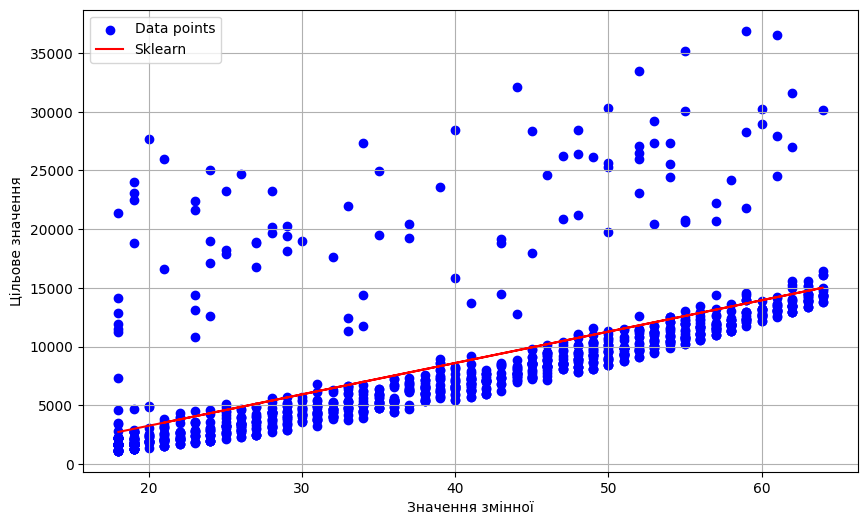

In [56]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

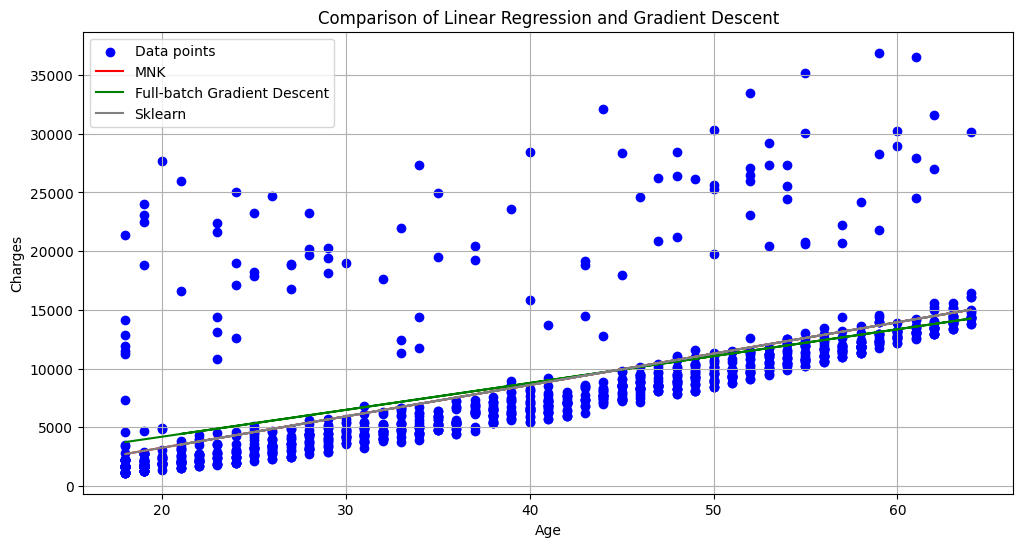

In [58]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
rmse_MNK, rmse_fbgd, rmse_sklearn

(4662.505766636395, 4697.886051966785, 4662.505766636395)

**Спостереження**
У моделей MNK  та sklearn однакові rmse та однакові лінії регресії. Мої найкращі припущення були з параметрами 300 і -4500. Перший параметр в побудованих моделях близький до того, що я підбирала вручну. Параметр -4500 відрізняється від того, що будуються в моделях Мнк та sklearn майже вдвічі. В даному прикладі градієнтний метод нам дав найгірші результати.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [63]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [64]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [71]:
X_smoker = smoker_df['age']

In [72]:
y_smoker = smoker_df['charges']

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_smoker.to_frame(), y_smoker)
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.12812691597)

In [74]:
predictions_sklearn_smoker = lin_reg.predict(X_smoker.to_frame())
rmse_sklearn = mean_squared_error(y, predictions_sklearn_smoker, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
predictions_sklearn_smoker[:3], y_smoker[:3]

(array([26093.642567  , 39218.85945773, 28535.54338388]),
 0     16884.9240
 11    27808.7251
 14    39611.7577
 Name: charges, dtype: float64)

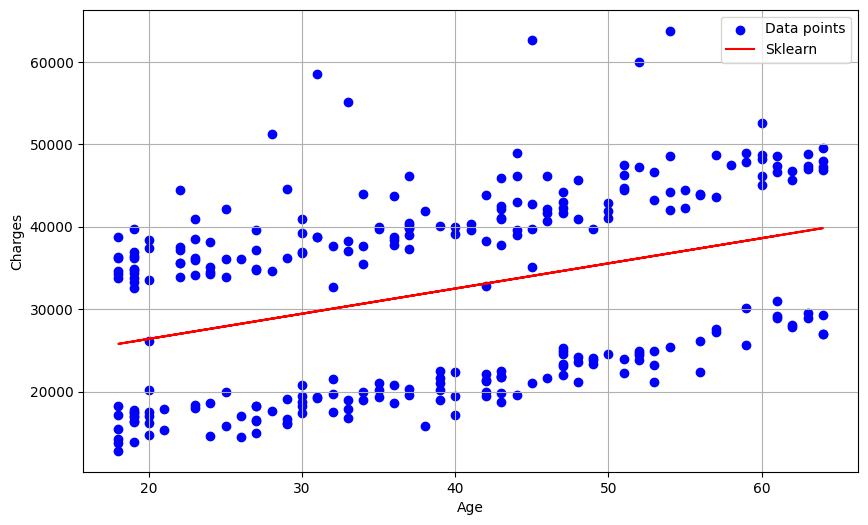

In [77]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn_smoker, color='red', label='Sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Спостереження**
Я вважаю, що це не дуже хороша модель, я б не використовувала її. Подубована лінія регресії погано описує наші дані, і дуже часто помиляється. Дані розділені на дві групи і лінія проходить між цими групами. Подубована лінія буде давати нам хибні прогнози.